In [1]:
#%matplotlib notebook
import os, time, sys
import importlib
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import clicfast2023.clicfast2023 as clicfast2023
import clicfast2023.analysis.interpreter as interpreter
import clicfast2023.analysis.event_builder as event_builder
import clicfast2023.analysis.fitfunctions as fitfunc


colsmall = np.array([0+3, 4+0, 4+3, 8+0, 8+3, 12+0, 12+3, 16+0, 16+3, 20+0, 20+3, 24+0, 24+3])
collarge = np.array([1, 0+2, 4+1, 4+2, 8+1, 8+2, 12+1, 12+2, 16+1, 16+2, 20+1, 20+2, 24+1, 24+2])

# if False:
!ping -c 1 192.168.10.16
if True:
    import clicfast2023.clicfast2023 as clicfast2023
    dut = clicfast2023.Clicfast2023()
    dut.init()
    en_comp = np.copy(dut.PixelConf['en_comp'])
    tdac = np.copy(dut.PixelConf['tdac'])

PING 192.168.10.16 (192.168.10.16) 56(84) bytes of data.
64 bytes from 192.168.10.16: icmp_seq=1 ttl=64 time=0.109 ms

--- 192.168.10.16 ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 0ms
rtt min/avg/max/mdev = 0.109/0.109/0.109/0.000 ms


2024-06-27 15:53:27,599 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing spi_inj (firmware version: 2), module basil.HL.spi, base_addr 0x10
2024-06-27 15:53:27,600 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing inj (firmware version: 1), module clicfast2023.pulse_gen_delay, base_addr 0x100
2024-06-27 15:53:27,601 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing sync (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x140
2024-06-27 15:53:27,601 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing gate (firmware version: 3), module basil.HL.pulse_gen, base_addr 0x180
2024-06-27 15:53:27,601 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing ts_inj (firmware version: 2), module basil.HL.timestamp, base_addr 0x1c0
2024-06-27 15:53:27,602 - basil.HL.RegisterHardwareLayer - [INFO    ] (MainThread) Initializing gpio (firmware version: 0), module basil.HL.gpio, base_addr 0x

In [2]:
config_file = os.path.join(os.path.dirname(clicfast2023.mk_fname('config')), 'collarge_tuned.yaml')
dut.load_config(config_file)
delay = 0
dut.set_conf(VNRegC=5, IPBigFine=8, IPSmallFine=8, IPFoll=0)
dut.set_inj(inj_n=100, inj_delay=10240+delay, inj_width=10240-delay, ext=True,
            to_inj_board=False, to_chip_trigger=False)
dut.set_sync()
dut.set_ts_trig()

2024-06-27 15:53:30,758 - root - [INFO    ] (MainThread) set_conf:
2024-06-27 15:53:30,769 - root - [INFO    ] (MainThread) set_ram row0 en_comp[0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0] tdac[7 4 7 7 7 1 4 7 7 1 5 7 7 1 2 7 7 4 3 7 7 1 7 7 7 6 6 7 7] wr_0,111,00001_1,100,00000_1,111,00000_0,111,00000_0,111,00000_1,001,00000_1,100,00000_0,111,00000_0,111,00000_1,001,00000_1,101,00000_0,111,00000_0,111,00000_1,001,00000_1,010,00000_0,111,00000_0,111,00000_1,100,00000_1,011,00000_0,111,00000_0,111,00000_1,001,00000_1,111,00000_0,111,00000_0,111,00000_1,110,00000_1,110,00000_0,111,00000_0,111,00000
2024-06-27 15:53:30,779 - root - [INFO    ] (MainThread) set_ram row1 en_comp[0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0] tdac[7 4 7 7 7 3 4 7 7 1 5 7 7 2 2 7 7 4 4 7 7 2 7 7 7 5 7 7 7] wr_0,111,00010_1,100,00000_1,111,00000_0,111,00000_0,111,00000_1,011,00000_1,100,00000_0,111,00000_0,111,00000_1,001,00000_1,101,00000_0,111,00000_0,111,00000_1,010,00000_1,010,000

In [4]:
import lab_devices.lab_devices as lab_devices
plsgen = lab_devices.PlsGen()
plsgen.init()
plsgen.set_inj_amp(high=5, low=0.0, unit='V')

2024-06-21 12:00:28,519 - root - [INFO    ] (MainThread) afg3252 set_amp high=5.000
2024-06-21 12:00:28,522 - root - [INFO    ] (MainThread) afg3252 set_amp low=0.000


In [5]:
import clicfast2023.scans.injection_scan as injection_scan
importlib.reload(injection_scan)
scan = injection_scan.InjectionScan(dut=dut)
fraw = scan.start(#phase=np.arange(0, 32*4*4, 1, dtype='int'),
                  phase=np.arange(0, 10.0E-9*4, 10.0E-9/32.),
                  #inj=np.arange(0.02, 1., 0.01)*10, 
                  inj=None,
                  cols=[1],
                  #cols=collarge,
                  comps=None,
                  plsgen_phase='external',
                  disable_noninjected_pixel=True,
                  plsgen=plsgen)

2024-06-21 12:00:30,263 - root - [INFO    ] (MainThread) Initializing InjectionScan
2024-06-21 12:00:30,263 - root - [INFO    ] (MainThread) Scan start time: 2024-06-21_12:00:30
2024-06-21 12:00:30,308 - root - [WARNING ] (MainThread) ScanBase.start:sender.init failed addr=tcp://127.0.0.1:6500
2024-06-21 12:00:30,431 - root - [INFO    ] (MainThread) set_rx: FPGA alined: aligned=1
2024-06-21 12:00:30,432 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 0
/home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/clicfast2023/scans/injection_scan.py:125: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  param_dtype = np.dtype(param_dtype)
2024-06-21 12:00:30,534 - root - [INFO    ] (MainThread) Received words: 0
2024-06-21 12:00:30,535 - root - [INFO    ] (MainThread) Data queue size: 0
2024-06-21 12:00:30,535 - root - [INFO    ] (MainThread) SRAM FIFO size: 0


Exception in thread TcpReadoutThread:
Traceback (most recent call last):
  File "/home/thirono/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/home/thirono/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/home/thirono/Nextcloud-kit/workspace/basil/basil/TL/SiTcp.py", line 428, in _tcp_readout
    data = self._sock_tcp.recv(1024 * 8)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [Errno 104] Connection reset by peer


2024-06-12 17:36:22,954 - root - [INFO    ] (MainThread) afg3252 set_amp high=5.000
2024-06-12 17:36:23,105 - root - [INFO    ] (MainThread) Initializing InjectionScan
2024-06-12 17:36:23,105 - root - [INFO    ] (MainThread) Scan start time: 2024-06-12_17:36:23
2024-06-12 17:36:23,152 - root - [WARNING ] (MainThread) ScanBase.start:sender.init failed addr=tcp://127.0.0.1:6500
2024-06-12 17:36:23,296 - root - [INFO    ] (MainThread) set_rx: FPGA alined: aligned=1
2024-06-12 17:36:23,297 - root - [INFO    ] (MainThread) Resetting Data-FIFO: size = 0
/home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/clicfast2023/scans/injection_scan.py:131: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  param_dtype = np.dtype(param_dtype)
2024-06-12 17:36:23,399 - root - [INFO    ] (MainThread) Received words: 0
2024-06-12 17:36:23,400 - root - [INFO    ] (MainThread) Data queue

Exception in thread TcpReadoutThread:
Traceback (most recent call last):
  File "/home/thirono/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/home/thirono/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/home/thirono/Nextcloud-kit/workspace/basil/basil/TL/SiTcp.py", line 428, in _tcp_readout
    data = self._sock_tcp.recv(1024 * 8)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [Errno 104] Connection reset by peer


In [3]:
col = 1

dut.set_en_ampout([col])
dut.set_en_inj([col])
dut.set_en_hitbus([])

dut.PixelConf['en_comp'][:, :] = 0xFF
en_comp = np.copy(dut.PixelConf['en_comp'])
en_comp[:, :] =0
en_comp[col, :] =1
dut.set_en_comp(en_comp)

dut.inject()

2024-06-21 11:58:32,721 - root - [INFO    ] (MainThread) set_en_ampout: en_ampout_col=0x00000002
2024-06-21 11:58:32,727 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000002
2024-06-21 11:58:32,732 - root - [INFO    ] (MainThread) set_en_hitbus: en_hitbus_col=0x1fffffff
2024-06-21 11:58:32,742 - root - [INFO    ] (MainThread) set_ram row0 en_comp[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 4 7 7 7 1 4 7 7 1 5 7 7 1 2 7 7 4 3 7 7 1 7 7 7 6 6 7 7] wr_0,111,00001_1,100,00000_0,111,00000_0,111,00000_0,111,00000_0,001,00000_0,100,00000_0,111,00000_0,111,00000_0,001,00000_0,101,00000_0,111,00000_0,111,00000_0,001,00000_0,010,00000_0,111,00000_0,111,00000_0,100,00000_0,011,00000_0,111,00000_0,111,00000_0,001,00000_0,111,00000_0,111,00000_0,111,00000_0,110,00000_0,110,00000_0,111,00000_0,111,00000
2024-06-21 11:58:32,752 - root - [INFO    ] (MainThread) set_ram row1 en_comp[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 4 7 7 7 3 4 7

In [5]:
scan.close()

2024-06-20 16:49:41,587 - root - [WARNING ] (MainThread) FIFO stop timeout
2024-06-20 16:49:41,587 - root - [INFO    ] (MainThread) Stopped FIFO readout


In [3]:
dut.set_conf(VDACTh=0x70,    #=0x80,(colsmall)
             VDACBL=0x8C, #0x8C,
             BLResP=5,
             IPBigFine=19,
             VP1=10,
             VP2=10,
             VNComp = 40,
             IPSmallFine=7,
             IPFoll=0,
             IPDAC=63,
             NFB2=5,
             PFB1=5,
             IPRegCasc=5,
             VNRegC=5, # INRegCasc in simulation
             VDACCascN=160,   #106 750mV
             VDACCascP=120,   #120, ##114 800mV in simulation
             Invert=0)
col = 0
comp = 1
delay = 0
dut.set_sync()
dut.set_inj(inj_n=0, inj_delay=10240+delay, inj_width=10240-delay, ext=True)
dut.set_triginj(inj_n=0, inj_delay=(1024*8+delay)*4, inj_width=(1024*8-delay)*4, ext=True)
dut.set_inj_amp(0.5, unit="V")
dut.inject_trig()
dut.set_en_ampout([col])
dut.set_en_inj([col])
dut.set_en_hitbus([col])

dut.PixelConf['en_comp'][:, :] = 0xFF
en_comp = np.copy(dut.PixelConf['en_comp'])
en_comp[:, :] =0
en_comp[col, :] =1  ## enable all comp
dut.set_en_comp(en_comp)



2024-06-11 17:25:33,451 - root - [INFO    ] (MainThread) set_conf:VDACTh=112VDACBL=140BLResP=5IPBigFine=19VP1=10VP2=10VNComp=40IPSmallFine=7IPFoll=0IPDAC=63NFB2=5PFB1=5IPRegCasc=5VNRegC=5VDACCascN=160VDACCascP=120Invert=0
2024-06-11 17:25:33,553 - root - [INFO    ] (MainThread) set_sync: sync_period=0x1000000 repeat=0 auto-sync=1 manual-sync=0
2024-06-11 17:25:33,555 - root - [INFO    ] (MainThread) set_inj: inj_width=10240 inj_delay=10240 inj_n=0 ext=1
2024-06-11 17:25:33,556 - root - [INFO    ] (MainThread) set_triginj: trig_width=32768 trig_delay=32768 trig_n=0 ext=1
2024-06-11 17:25:33,557 - root - [INFO    ] (MainThread) inj_amp: 2651
2024-06-11 17:25:33,562 - root - [INFO    ] (MainThread) set_en_ampout: en_ampout_col=0x00000001
2024-06-11 17:25:33,567 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001
2024-06-11 17:25:33,572 - root - [INFO    ] (MainThread) set_en_hitbus: en_hitbus_col=0x1ffffffe
2024-06-11 17:25:33,582 - root - [INFO    ] (MainThread) set_

In [6]:
dut.set_inj(inj_n=1, inj_delay=1024*8+delay, inj_width=1024*8-delay, ext=False)
dut.set_triginj(inj_n=10, inj_delay=(1024*8+delay)*4, inj_width=(1024*8+delay)*4, ext=True)
#dut['inj'].set_phase(2)
dut.inject()
dut.inject_trig()
dut.set_rx(False)
dut.set_sync(auto_sync=True)
dut.set_ts_trig(True)
dut.set_rx(True, edge=0)
dut.mask_rx(True)

2024-05-14 11:13:34,207 - root - [INFO    ] (MainThread) set_inj: inj_width=8192 inj_delay=8192 inj_n=1 ext=0
2024-05-14 11:13:34,208 - root - [INFO    ] (MainThread) set_triginj: trig_width=32768 trig_delay=32768 trig_n=10 ext=1
2024-05-14 11:13:34,310 - root - [INFO    ] (MainThread) set_sync: sync_period=0x1000000 repeat=0 auto-sync=1 manual-sync=0


## s-curve scan

In [6]:
import clicfast2023.analysis.interpreter as interpreter
importlib.reload(interpreter)
fraw = '/home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/output/injection_scan/20240415_185741_injection_scan.h5'
fhit = fraw[:-7]+'hit.h5'
interpreter.interpret_h5(fraw, fhit)

FileNotFoundError: ``/home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/output/injection_scan/20240415_185741_injection_scan.h5`` does not exist

In [20]:
import clicfast2023.analysis.event_builder as event_builder
importlib.reload(event_builder)
event_builder.build_h5(fraw, fhit)

2024-04-15 19:15:23,848 - root - [INFO    ] (MainThread) BuildHit.run() n of error_hit=37
2024-04-15 19:15:23,850 - root - [INFO    ] (MainThread) 0.12s hit=153631/153631 event=153594 ts=12800/12800


In [19]:
dut.set_phase(128)
dut.set_phase(129)
dut.set_phase(130)
hex(dut['trig']["DELAY"] & 0xFFFC), hex(int(130//32))

2024-04-15 20:14:03,506 - root - [INFO    ] (MainThread) set_phase: trig_width=0x2a40 trig_delay=0x25c0 phase=0
2024-04-15 20:14:03,507 - root - [INFO    ] (MainThread) set_phase: trig_width=0x2a44 trig_delay=0x25bc phase=1
2024-04-15 20:14:03,508 - root - [INFO    ] (MainThread) set_phase: trig_width=0x2a48 trig_delay=0x25b8 phase=2


('0x2a48', '0x4')

2023-11-30 18:22:51,285 - matplotlib.legend - [WARNING ] (MainThread) No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


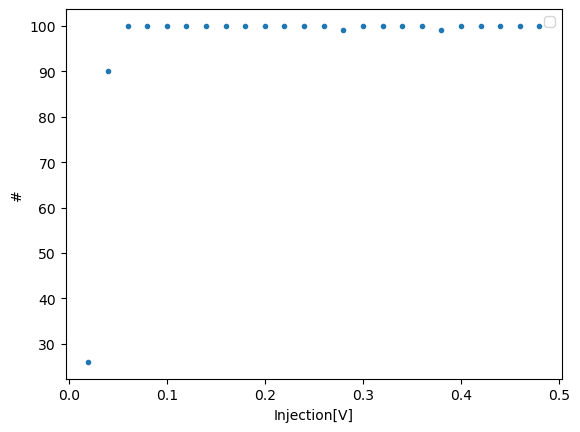

In [237]:
with tb.open_file(fhit) as f:
    dat = f.root.event_data[:]
with tb.open_file(fraw) as f:
    param = f.root.scan_parameters[:]
    
dat0 = dat[dat['comp']==0]
uni, idx= np.unique(dat0['timestamp'], return_index=True)
dat0 = dat0[idx]
nhit = np.bincount(dat0['event_number']) #, minlength=len(param))
plt.plot(param['inj'], nhit, '.')

plt.xlabel('Injection[V]')
plt.ylabel('#')
plt.legend()

Text(0.5, 1.0, 'Comparator1')

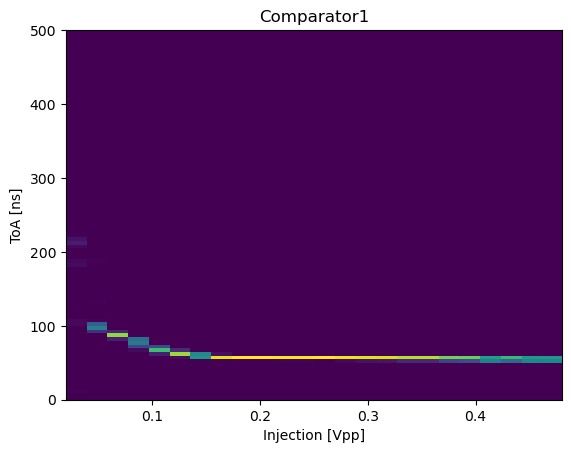

In [238]:
## timewalk
n = 100 #2**11
nsteps = param.shape[0]
toa = np.empty([n, nsteps])
for i in range(nsteps):
    ev = dat0[dat0['event_number']==i]
    tmp = np.array([
            ev['col']==col,
            ev['row']==row])
    ev = ev[np.all(tmp, axis=0)]
    toa[:,i] = np.bincount(ev['toa'], minlength=n)[:n]

plt.imshow(toa, origin='lower', extent=(param['inj'][0], param['inj'][-1], 0, n*5), aspect='auto')
plt.xlabel('Injection [Vpp]')
plt.ylabel('ToA [ns]')
plt.title('Comparator1')


Text(0.5, 1.0, 'Comparator1')

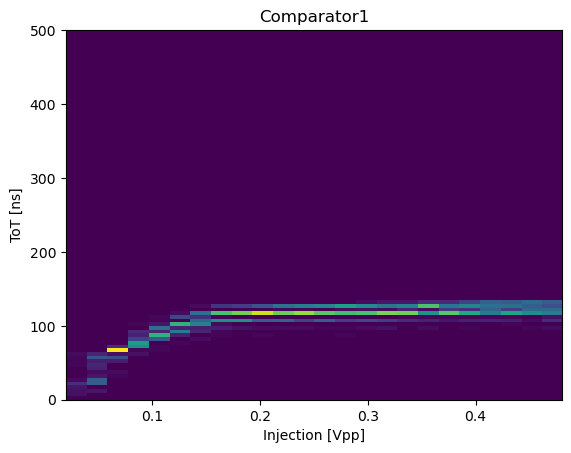

In [239]:
## timewalk
n = 100 #2**11
nsteps = param.shape[0]
tot = np.empty([n, nsteps])
for i in range(nsteps):
    ev = dat0[dat0['event_number']==i]
    tmp = np.array([
            ev['col']==col,
            ev['row']==row])
    ev = ev[np.all(tmp, axis=0)]
    tot[:,i] = np.bincount(ev['tot'], minlength=n)[:n]

plt.imshow(tot, origin='lower', extent=(param['inj'][0], param['inj'][-1], 0, n*5), aspect='auto')
plt.xlabel('Injection [Vpp]')
plt.ylabel('ToT [ns]')
plt.title('Comparator1')


In [26]:
dut.set_rx(False)

In [15]:
256/32/4

2.0